In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [2]:
train_data = pd.read_csv("C:\\Users\\sachi\\Downloads\\Academic_Success_data\\train.csv")

In [3]:
test_data =  pd.read_csv("C:\\Users\\sachi\\Downloads\\Academic_Success_data\\test.csv")

## About the dataset

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Predict Students' Dropout and Academic Success dataset
**Variable Description**
- **Target**: The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course (Categorical)
- **Marital Status**: Categorical values representing different marital situations (1 – single,  2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6  legally separated)
- **Application mode**: Describes how the student applied to the institution(1 - 1st phase - general contingent , 2 - Ordinance No. 612/93 , 5 - 1st phase  special contingent (Azores Island) , 7 - Holders of other higher courses , 10 - Ordinance No. 854-B/99, 15 - International student (bachelor), 16 - 1st phase special contingent (Madeira Island), 17 - 2nd phase - general contingent, 18 - 3rd phase - general contingent, 26 - Ordinance No. 533-A/99, item b2) (Different Plan), 27 - Ordinance No. 533-A/99, item b3 (Other Institution), 39 - Over 23 years old, 42 - Transfer, 43 - Change of course, 44 - Technological specialization diploma holders, 51 - Change of institution/course 53 - Short cycle diploma holders, 57 - Change of institution/course (International)
- **Application order**: Indicates the student's preference for the program they applied to. (between 0 - first choice; and 9 last choice)
- **Course**: Represents the program or course the student applied to.
   - 33 - Biofuel Production Technologies
   - 171 - Animation and Multimedia Design
   - 8014 - Social Service (evening attendance)
   - 9003 - Agronomy 9070 - Communication Design
   - 9085 - Veterinary Nursing
   - 9119 - Informatics Engineering
   - 9130 - Equinculture
   - 9147 - Management
   - 9238 - Social Service
   - 9254 - Tourism
   - 9500 - Nursing
   - 9556 - Oral Hygiene
   - 9670 - Advertising and Marketing Management
   - 9773 - Journalism and Communication
   - 9853 - Basic Education
   - 9991 - Management (evening attendance)
- **Daytime/evening attendance**: 1 – daytime,  0 - evening
- **Admission grade**: Admission grade (between 0 and 200) (Continuous)
- **Previous qualification**:
  - 1 - Secondary education
  - 2 - Higher education - bachelor's degree
  - 3 - Higher education - degree
  - 4 - Higher education - master's
  - 5 - Higher education - doctorate
  - 6 - Frequency of higher education
  - 9 - 12th year of schooling - not completed
  - 10 - 11th year of schooling - not completed 12 - Other
  - 11th year of schooling
  - 14 - 10th year of schooling
  - 15 - 10th year of schooling - not completed
  - 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
  - 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
  - 39 - Technological specialization course
  - 40 - Higher education - degree (1st cycle)
  - 42 - Professional higher technical course
  - 43 - Higher education - master (2nd cycle)
- **Previous qualification (grade)**: Grade of previous qualification (between 0 and 200) (continous variable)
- **Displaced**: 1 – yes 0 – no
- **Nacionality**: Nationality
  - 1 - Portuguese
  - 2 - German
  - 6 - Spanish
  - 11 - Italian
  - 13 - Dutch
  - 14 - English
  - 17 - Lithuanian
  - 21 - Angolan
  - 22 - Cape Verdean
  - 24 - Guinean
  - 25 - Mozambican
  - 26 - Santomean
  - 32 - Turkish
  - 41 - Brazilian
  - 62 - Romanian
  - 100 - Moldova (Republic of)
  - 101 - Mexican
  - 103 - Ukrainian
  - 105 - Russian
  - 108 - Cuban
  - 109 - Colombian
- **Educational special needs**: 1 – yes, 0 – no		
- **Debtor**: 1 – yes 0 – no
- **Tuition fees up to date**: 1 – yes , 0 – no
- **Gender**: Gender. (1 – male , 0 – female)		
- **Scholarship holder**: 1 – yes,  0 – no	
- **Age at enrollment**: Age of student at enrollment
- **International**:1 – yes 0 – no		no
- **Curricular units 1st sem (credited)**: Number of curricular units credited in the 1st semester		
- **Curricular units 1st sem (enrolled)**: Number of curricular units enrolled in the 1st semester		
- **Curricular units 1st sem (evaluations)**: Number of evaluations to curricular units in the 1st semester		
- **Curricular units 1st sem (approved)**: Number of curricular units approved in the 1st semester
- **Curricular units 1st sem (grade)**: Grade average in the 1st semester (between 0 and 20)		
- **Curricular units 1st sem (without evaluations)**: Number of curricular units without evalutions in the 1st semester
- **Curricular units 2nd sem (credited)**: Number of curricular units credited in the 2nd semester	
- **Curricular units 2nd sem (enrolled)**: Number of curricular units enrolled in the 2nd semester	
- **Curricular units 2nd sem (evaluations)**: Number of evaluations to curricular units in the 2nd semester
- **Curricular units 2nd sem (approved)**: Number of curricular units approved in the 2nd semester		
- **Curricular units 2nd sem (grade)**: Grade average in the 2nd semester (between 0 and 20)		
- **Curricular units 2nd sem (without evaluations)**: Number of curricular units without evalutions in the 1st semester	
- **Unemployment rate**: Unemployment rate (%) (Continuous)
- **Inflation rate**: Inflation rate (%) (Continuous)
- **GDP**: GDP	(Continuous)
- **Mother's qualification, Fathers qualification**:
  - 1 - Secondary Education - 12th Year of Schooling or Eq.
  - 2 - Higher Education - Bachelor's Degree
  - 3 - Higher Education - Degree
  - 4 - Higher Education - Master's
  - 5 - Higher Education - Doctorate
  - 6 - Frequency of Higher Education
  - 9 - 12th Year of Schooling - Not Completed
  - 10 - 11th Year of Schooling - Not Completed
  - 11 - 7th Year (Old)
  - 12 - Other - 11th Year of Schooling
  - 14 - 10th Year of Schooling
  - 18 - General commerce course
  - 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
  - 20 - Complementary High School Course
  - 22 - Technical-professional course
  - 25 - Complementary High School Course - not concluded
  - 26 - 7th year of schooling
  - 27 - 2nd cycle of the general high school course
  - 29 - 9th Year of Schooling - Not Completed
  - 30 - 8th year of schooling
  - 31 - General Course of Administration and Commerce
  - 33 - Supplementary Accounting and Administration
  - 34 - Unknown
  - 35 - Can't read or write
  - 36 - Can read without having a 4th year of schooling
  - 37 - Basic education 1st cycle (4th/5th year) or equiv.
  - 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
  - 39 - Technological specialization course
  - 40 - Higher education - degree (1st cycle)
  - 41 - Specialized higher studies course
  - 42 - Professional higher technical course
  - 43 - Higher Education - Master (2nd cycle)
  - 44 - Higher Education - Doctorate (3rd cycle)
- **Father's occupation, Mother's occupation**:
  - 0 - Student
  - 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
  - 2 - Specialists in Intellectual and Scientific Activities
  - 3 - Intermediate Level Technicians and Professions
  - 4 - Administrative staff
  - 5 - Personal Services, Security and Safety Workers and Sellers
  - 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
  - 7 - Skilled Workers in Industry, Construction and Craftsmen
  - 8 - Installation and Machine Operators and Assembly Workers
  - 9 - Unskilled Workers
  - 10 - Armed Forces Professions
  - 90 - Other Situation
  - 99 - (blank)
  - 101 - Armed Forces Officers
  - 102 - Armed Forces Sergeants
  - 103 - Other Armed Forces personnel
  - 112 - Directors of administrative and commercial services
  - 114 - Hotel, catering, trade and other services directors
  - 121 - Specialists in the physical sciences, mathematics, engineering and related techniques
  - 122 - Health professionals
  - 123 - teachers
  - 124 - Specialists in finance, accounting, administrative organization, public and commercial relations
  - 125 - Specialists in Information and Communication Technologies (ICT)
  - 131 - Intermediate level science and engineering technicians and professions
  - 132 - Technicians and professionals, of intermediate level of health
  - 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
  - 135 - Information and communication technology technicians
  - 141 - Office workers, secretaries in general and data processing operators
  - 143 - Data, accounting, statistical, financial services and registry-related operators
  - 144 - Other administrative support staff
  - 151 - personal service workers
  - 152 - sellers
  - 153 - Personal care workers and the like
  - 154 - Protection and security services personnel
  - 161 - Market-oriented farmers and skilled agricultural and animal production workers
  - 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
  - 171 - Skilled construction workers and the like, except electricians
  - 172 - Skilled workers in metallurgy, metalworking and similar
  - 173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans, etc.:
  - 174 - Skilled workers in electricity and electronics
  - 175 - Workers in food processing, woodworking, clothing and other industries and crafts
  - 181 - Fixed plant and machine operators
  - 182 - assembly workers
  - 183 - Vehicle drivers and mobile equipment operators
  - 191 - Cleaning Workers
  - 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
  - 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
  - 194 - Meal preparation assistants
  - 195 - Street vendors (except food) and street service providers		

# Problem Statement
The goal of this competition is to predict student academic status using a variety of student-related features.
The target variable in this dataset has three classes:
- Graduate: Students who successfully completed their studies.
- Dropout: Students who discontinued their studies before completion.
- Enrolled: Students who are currently attending or have not yet graduated.
   
The goal is to classify students into one of three groups: Graduate, Dropout, and  Enrolled , based on their features.

# Exploratory data analysis (EDA)

In [8]:
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [9]:
train_data.describe() #summary statistics

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [10]:
train_data.shape

(76518, 38)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

- Numerical columns: 'Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment'
- Categorical columns: 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target'

In [13]:
train_data["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [14]:
train_data["Target"].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

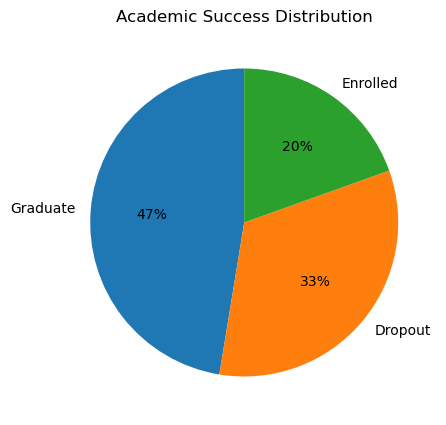

In [15]:
# Pie chart for Target distribution
train_data['Target'].value_counts().plot.pie(autopct="%.0f%%", labels=train_data['Target'].value_counts().index, figsize=(5, 5), startangle=90)
plt.title('Academic Success Distribution')
plt.axis('off')  
plt.show()


In [16]:
### splitting Numerical and Categorical Columns
train_num_df =train_data[["Admission grade", "Previous qualification (grade)","Curricular units 1st sem (credited)",
                          "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
                          "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
                          "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
                          "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)",
                          "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)",
                          "Curricular units 2nd sem (without evaluations)", "Unemployment rate", 
                          "Inflation rate", "GDP", "Age at enrollment"]]
train_cat_df = train_data[["Marital status", "Application mode", "Application order", "Course", 
                           "Daytime/evening attendance", "Previous qualification", "Nacionality", 
                           "Mother's qualification", "Father's qualification", "Mother's occupation", 
                           "Father's occupation", "Displaced","Educational special needs", "Debtor", 
                           "Tuition fees up to date", "Gender", "Scholarship holder","International","Target"]]

In [17]:
print ("Numerical columns are")
num_cols = train_num_df.columns.tolist()
print(num_cols)

Numerical columns are
['Admission grade', 'Previous qualification (grade)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment']


In [18]:
print ("Categorical columns are")
cat_cols = train_cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']


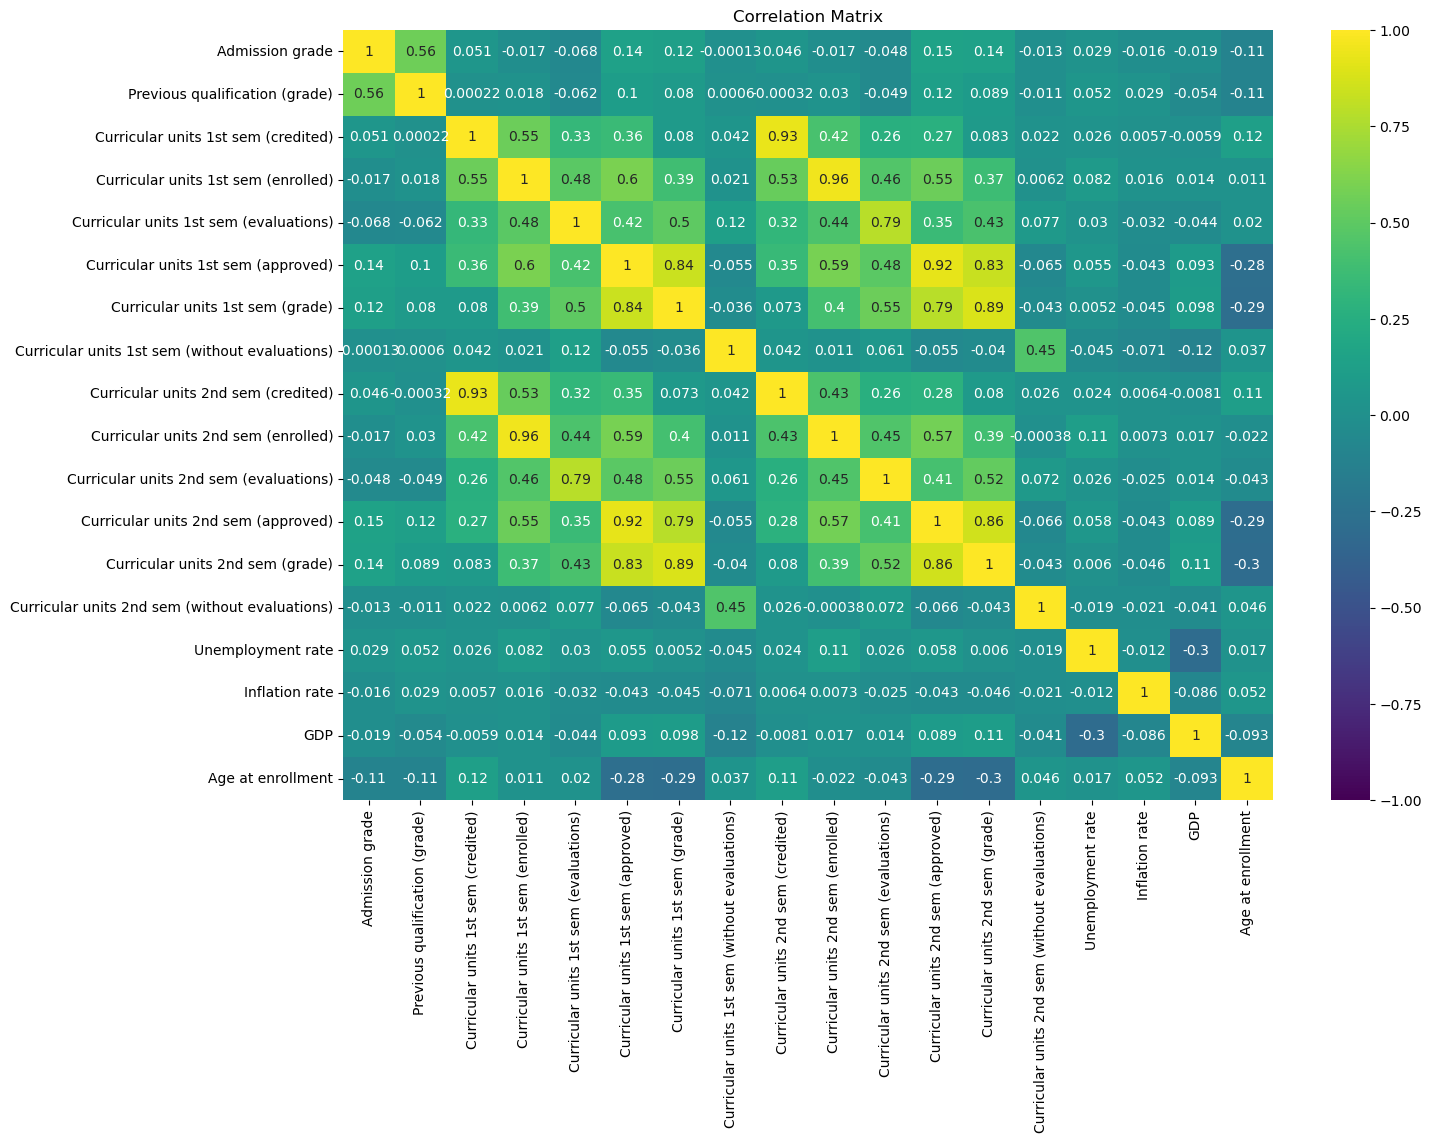

In [19]:
#plotting correlation matrix of numerical variables
corr_matrix = train_num_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

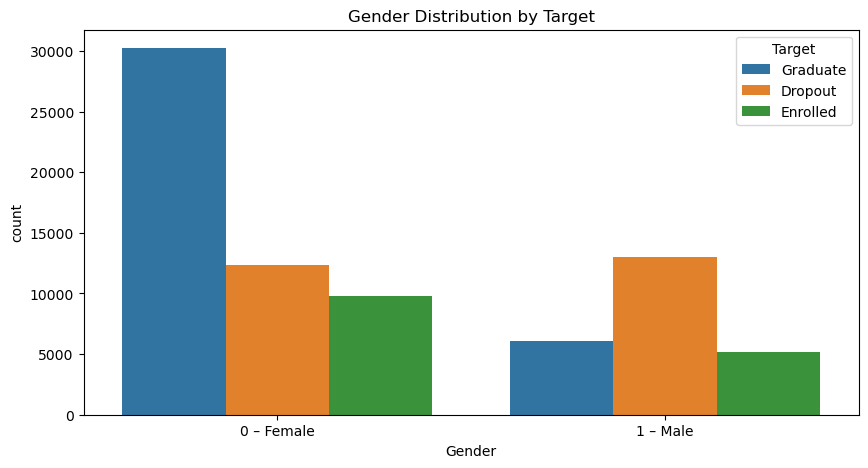

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='Gender', hue='Target')
plt.title('Gender Distribution by Target')
plt.xticks(ticks=[0, 1], labels=['0 – Female', '1 – Male'])
plt.show()

In [21]:
# Here(1 – male , 0 – female)

# Data Pre-processing on Train data

In [23]:
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


#### Checking Duplicates

In [25]:
train_data.duplicated().sum()          #checking duplicated rows

0

In [26]:
train_data.columns.duplicated().sum()   #checking duplicated rows

0

#### Checking missing values

In [28]:
train_data.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

*No missing values in the dataset*

#### Dropping unwanted columns

In [31]:
train_data.drop("id", axis = 1, inplace = True)

#### Encoding Categorical Variables

In [33]:
label_enc = LabelEncoder()

In [34]:

train_data["Target"] = label_enc.fit_transform(train_data["Target"])

In [35]:
train_data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0


In [36]:
#display the original values corresponding to the encoded labels
for i, class_name in enumerate(label_enc.classes_):
    print(f"{i} - {class_name}")

0 - Dropout
1 - Enrolled
2 - Graduate


#### Outlier Handling

In [38]:
train_num_df.head(3)

,Admission grade,Previous qualification (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment
0,122.6,126.0,0,6,6,6,14.5,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,18
1,119.8,125.0,0,6,8,4,11.6,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,18
2,144.7,137.0,0,6,0,0,0.0,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,18


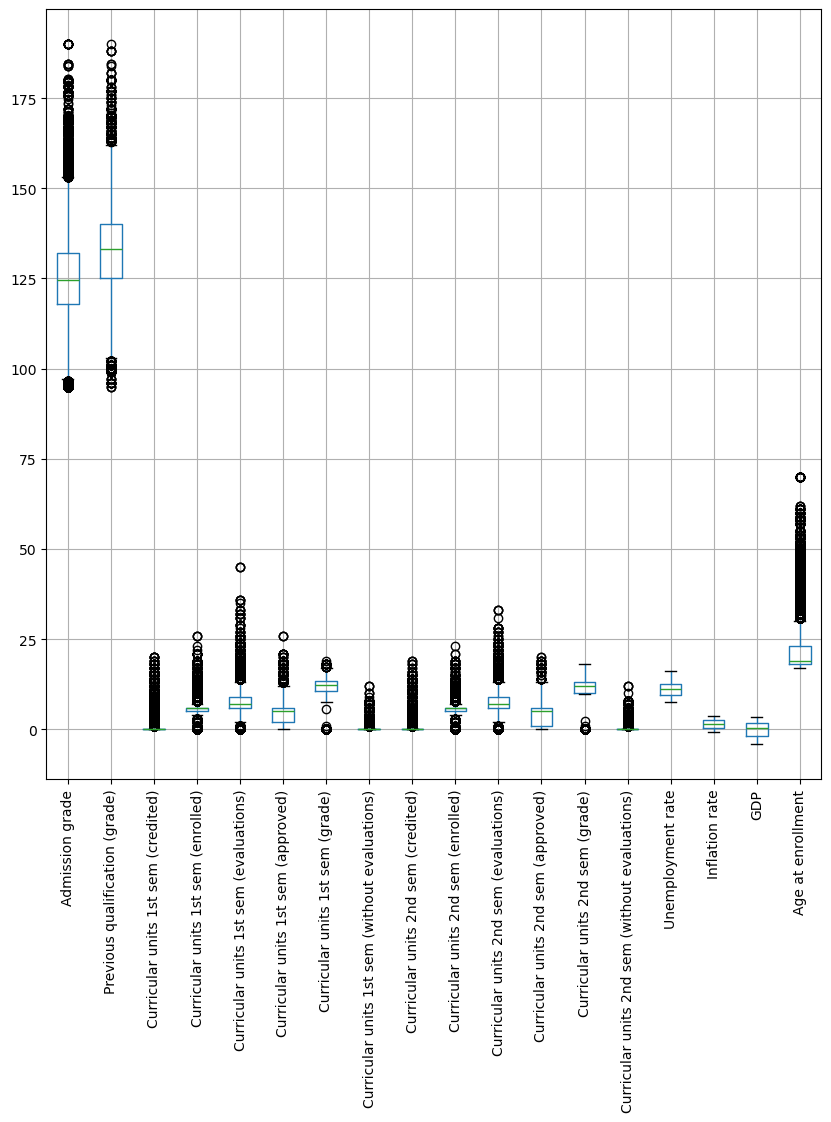

In [39]:
train_num_df.boxplot(figsize=(10,10))
#plt.xlim(-5, 250)
plt.xticks(rotation = 90)
plt.show()

In [40]:
def remove_outliers(train_num_df, column_name):
    q1 = train_num_df[column_name].quantile(0.25)
    q3 = train_num_df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    train_num_df[column_name] = train_num_df [column_name].clip(upper = upper_bound)
    train_num_df[column_name] = train_num_df [column_name].clip(lower = lower_bound)
    return train_num_df[column_name]
for col in num_cols:
    train_num_df[col] = remove_outliers(train_num_df, col)

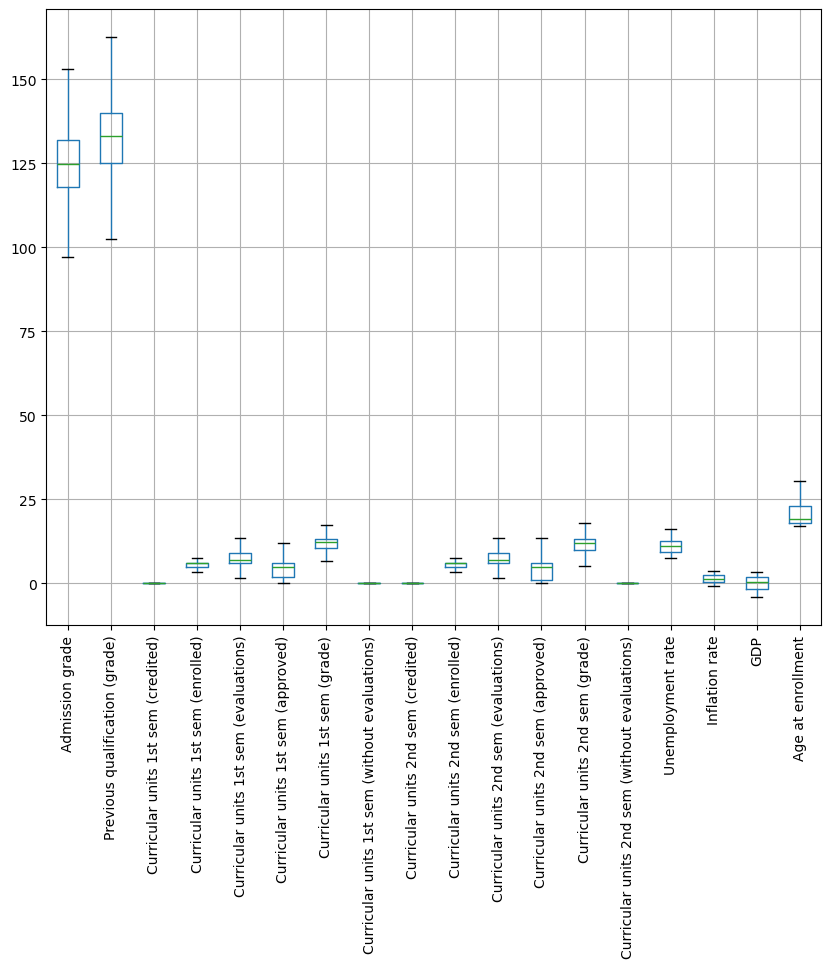

In [41]:
train_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

### Scaling Numerical Variables

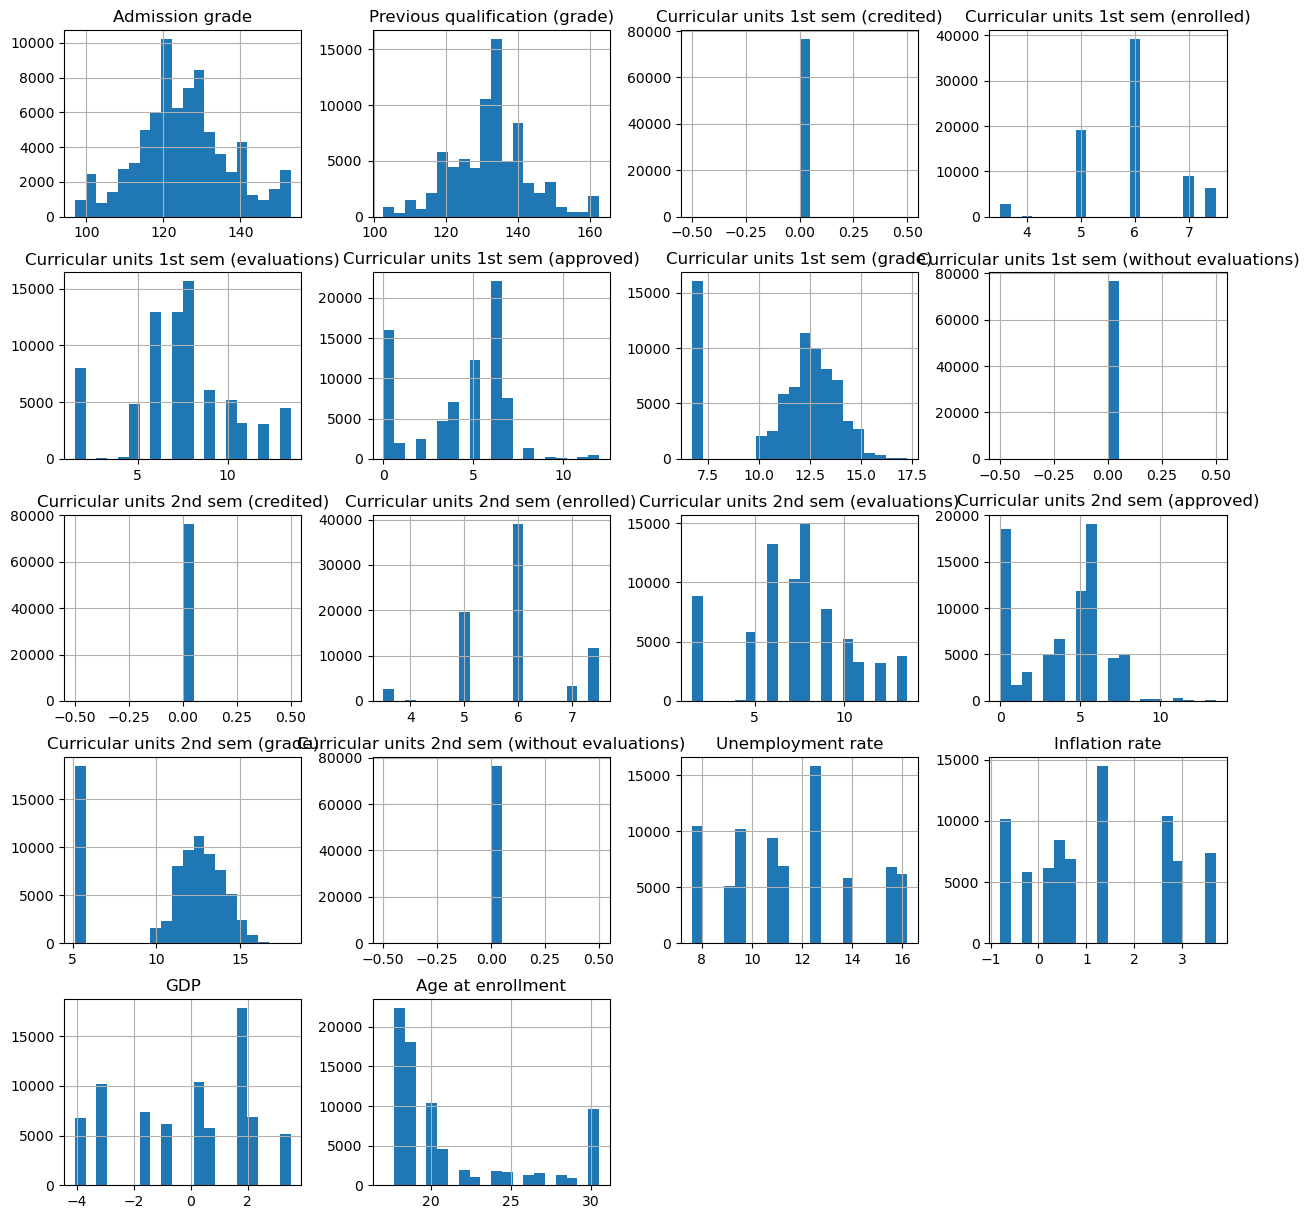

In [43]:
train_num_df.hist(bins=20, figsize= (15,15))
plt.show()

In [44]:
# Identify columns to scale
right_skewed_cols = ['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                    'Age at enrollment',]
symmetric_cols = ['Admission grade', 'Previous qualification (grade)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    train_num_df[col] = np.log1p(train_num_df[col])

# Apply MinMaxScaler for skewed columns
train_num_df[right_skewed_cols] = min_max_scaler.fit_transform(train_num_df[right_skewed_cols])

# Apply StandardScaler for symmetric columns
train_num_df[symmetric_cols] = standard_scaler.fit_transform(train_num_df[symmetric_cols])

print("Scaling complete. Scaled data:")
train_num_df.head(3)



Scaling complete. Scaled data:


,Admission grade,Previous qualification (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment
0,-0.215738,-0.590806,0,0.694718,0.585724,0.758654,1.165058,0,0,0.694718,0.661686,0.727675,0.456524,0,11.1,0.6,2.02,0.096615
1,-0.448160,-0.683827,0,0.694718,0.728690,0.627474,0.075607,0,0,0.694718,0.788627,0.000000,-1.674804,0,11.1,0.6,2.02,0.096615
2,1.618737,0.432424,0,0.694718,0.000000,0.000000,-1.766978,0,0,0.694718,0.000000,0.000000,-1.674804,0,16.2,0.3,-0.92,0.096615


In [45]:
train_cleaned = pd.concat([train_cat_df, train_num_df], axis=1) # combining scaled and encoded data frames

In [46]:
train_cleaned.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment
0,1,1,1,9238,1,1,1,1,19,5,...,0,0.694718,0.661686,0.727675,0.456524,0,11.1,0.6,2.02,0.096615
1,1,17,1,9238,1,1,1,19,19,9,...,0,0.694718,0.788627,0.000000,-1.674804,0,11.1,0.6,2.02,0.096615
2,1,17,2,9254,1,1,1,3,19,2,...,0,0.694718,0.000000,0.000000,-1.674804,0,16.2,0.3,-0.92,0.096615


#### Checking Class Imbalance

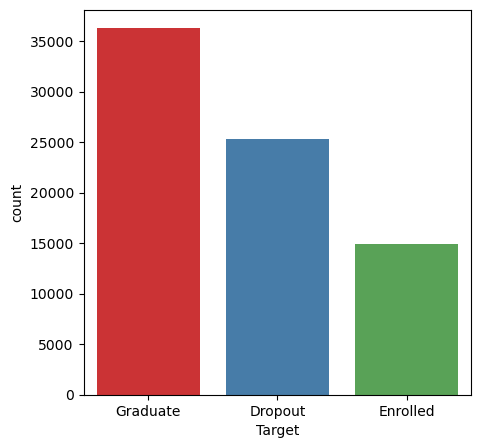

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data= train_cleaned, x='Target', order =train_cleaned.Target.value_counts().index, palette='Set1')
plt.show()

 # Model  Building  & Evaluation

In [50]:
#### Test-Train Split 

In [51]:
y = train_cleaned["Target"]
X = train_cleaned.drop("Target",axis = 1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 35)

## 1. Logistic Regression

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X,y)

LogisticRegression()

In [55]:
lr_pred = lr_model.predict(X_test)

In [56]:
print('Accuracy:', accuracy_score(y_test, lr_pred))
print('Precision:', precision_score(y_test, lr_pred, average='weighted'))
print('Recall:', recall_score(y_test, lr_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, lr_pred, average='weighted'))

Accuracy: 0.613434396236278
Precision: 0.5574383575625186
Recall: 0.613434396236278
F1 Score: 0.5527563937063966


In [57]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

     Dropout       0.67      0.58      0.62      5076
    Enrolled       0.27      0.03      0.05      2978
    Graduate       0.60      0.88      0.71      7250

    accuracy                           0.61     15304
   macro avg       0.51      0.49      0.46     15304
weighted avg       0.56      0.61      0.55     15304



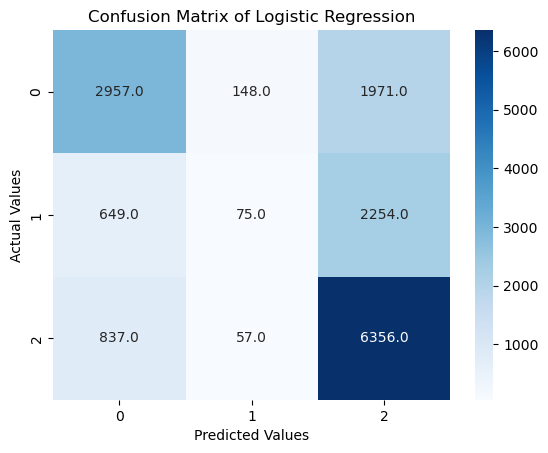

In [58]:
cm1= confusion_matrix(y_test,lr_pred)
ax = sns.heatmap(cm1, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Logistic Regression')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

## 2. KNN

In [60]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [61]:
print('accuracy:',accuracy_score(y_test,knn_pred,))
print('precision:',precision_score(y_test,knn_pred,average='weighted'))
print('recall:',recall_score(y_test,knn_pred,average='weighted'))
print('f1_score:',f1_score(y_test,knn_pred,average='weighted'))

accuracy: 0.6767511761630947
precision: 0.6673660752163268
recall: 0.6767511761630947
f1_score: 0.6700411687361723


In [62]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

     Dropout       0.73      0.69      0.71      5076
    Enrolled       0.44      0.36      0.39      2978
    Graduate       0.72      0.80      0.76      7250

    accuracy                           0.68     15304
   macro avg       0.63      0.62      0.62     15304
weighted avg       0.67      0.68      0.67     15304



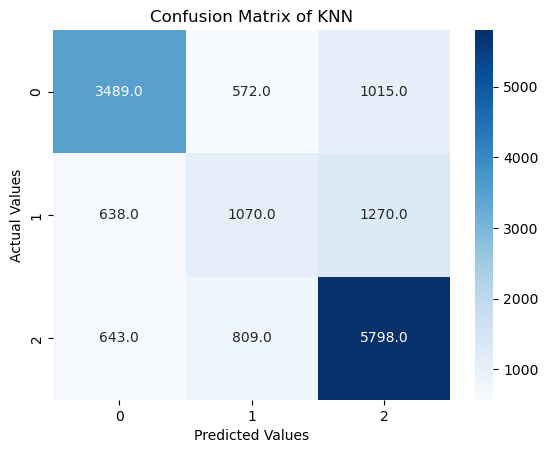

In [63]:
cm2 = confusion_matrix(y_test,knn_pred)
ax = sns.heatmap(cm2, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of KNN')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

## 3. Decision Tree

In [65]:
dt = DecisionTreeClassifier(random_state = 60)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [66]:
print('accuracy:',accuracy_score(y_test,dt_pred,))
print('precision:',precision_score (y_test, dt_pred,average='weighted'))
print('recall:',recall_score(y_test, dt_pred,average='weighted'))
print('f1_score:',f1_score(y_test, dt_pred,average='weighted'))

accuracy: 0.7411787767903816
precision: 0.7431169781588189
recall: 0.7411787767903816
f1_score: 0.7420815628470063


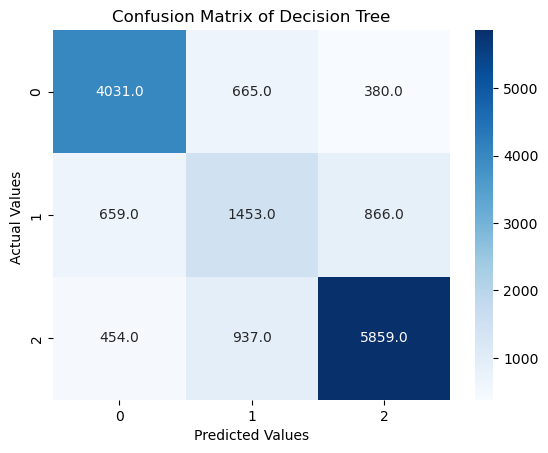

In [67]:
cm3 = confusion_matrix(y_test, dt_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

4. Random Forest

In [69]:
rf = RandomForestClassifier(random_state = 60) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [70]:
print('accuracy:',accuracy_score(y_test,rf_pred,))
print('precision:',precision_score( y_test,rf_pred,average='weighted'))
print('recall:',recall_score(y_test,rf_pred,average='weighted'))
print('f1_score:',f1_score(y_test,rf_pred,average='weighted'))

accuracy: 0.8271693674856246
precision: 0.8247124070632619
recall: 0.8271693674856246
f1_score: 0.8245323732224191


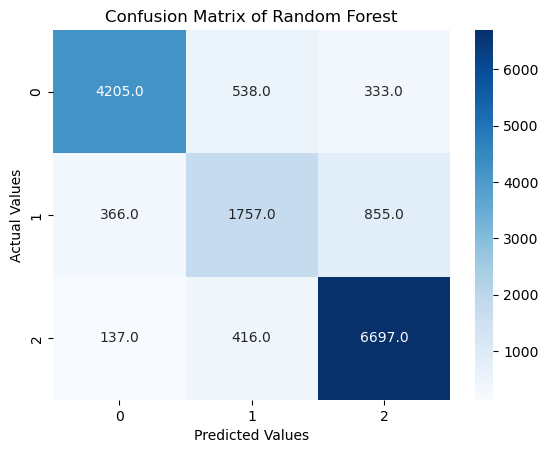

In [71]:
cm4 = confusion_matrix(y_test, rf_pred)
ax = sns.heatmap(cm4, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Confusion Matrix of Random Forest')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

### Insights
- Random Forest classifier perform well with an accuracy score of 82.71%, precision of 82.47% , recall of 82.71% and f1 score of 82.45%.Thus it can be used to predict accademic status of students 

# Preprocessing on Test data

In [74]:
test_data =  pd.read_csv("C:\\Users\\sachi\\Downloads\\Academic_Success_data\\test.csv")

In [75]:
test_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [76]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [77]:
test_data.shape

(51012, 37)

#### Checking Duplicates 

In [79]:
# checking duplicate rows
test_data.duplicated().sum()

0

In [80]:
# checking duplicate columns
test_data.columns.duplicated().sum()

0

#### Checking Missing values

In [82]:
test_data.isna().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [83]:
##Dropping id coulmn
test_data.drop("id", axis = 1, inplace = True)

In [84]:
### splitting Numerical and Categorical Columns
test_num_df =test_data[["Admission grade", "Previous qualification (grade)","Curricular units 1st sem (credited)",
                          "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
                          "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
                          "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
                          "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)",
                          "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)",
                          "Curricular units 2nd sem (without evaluations)", "Unemployment rate", 
                          "Inflation rate", "GDP", "Age at enrollment"]]
test_cat_df = test_data[["Marital status", "Application mode", "Application order", "Course", 
                           "Daytime/evening attendance", "Previous qualification", "Nacionality", 
                           "Mother's qualification", "Father's qualification", "Mother's occupation", 
                           "Father's occupation", "Displaced","Educational special needs", "Debtor", 
                           "Tuition fees up to date", "Gender", "Scholarship holder","International"]]

#### Outlier Handling

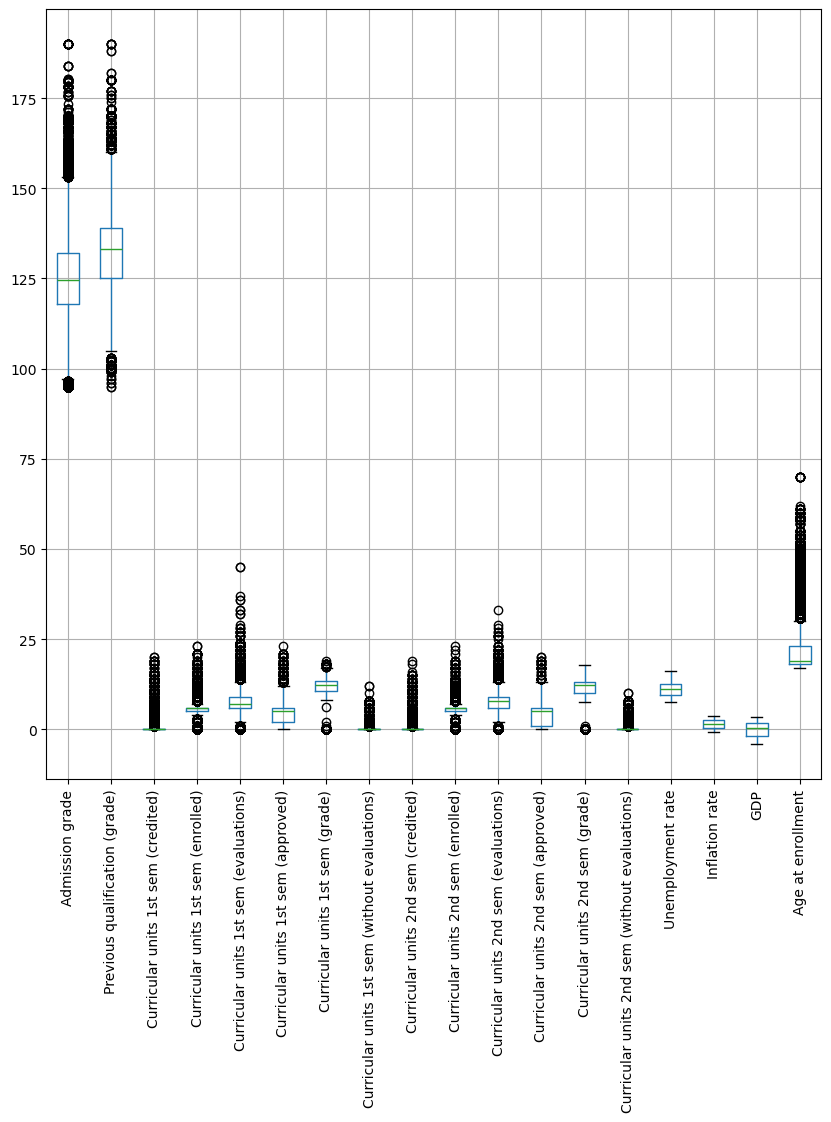

In [86]:
test_num_df.boxplot(figsize=(10,10))
plt.xticks(rotation = 90)
plt.show()

In [87]:
def remove_outliers(test_num_df, column_name):
    q1 = test_num_df[column_name].quantile(0.25)
    q3 = test_num_df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    test_num_df[column_name] = test_num_df [column_name].clip(upper = upper_bound)
    test_num_df[column_name] = test_num_df [column_name].clip(lower = lower_bound)
    return test_num_df[column_name]
for col in num_cols:
    test_num_df[col] = remove_outliers(test_num_df, col)

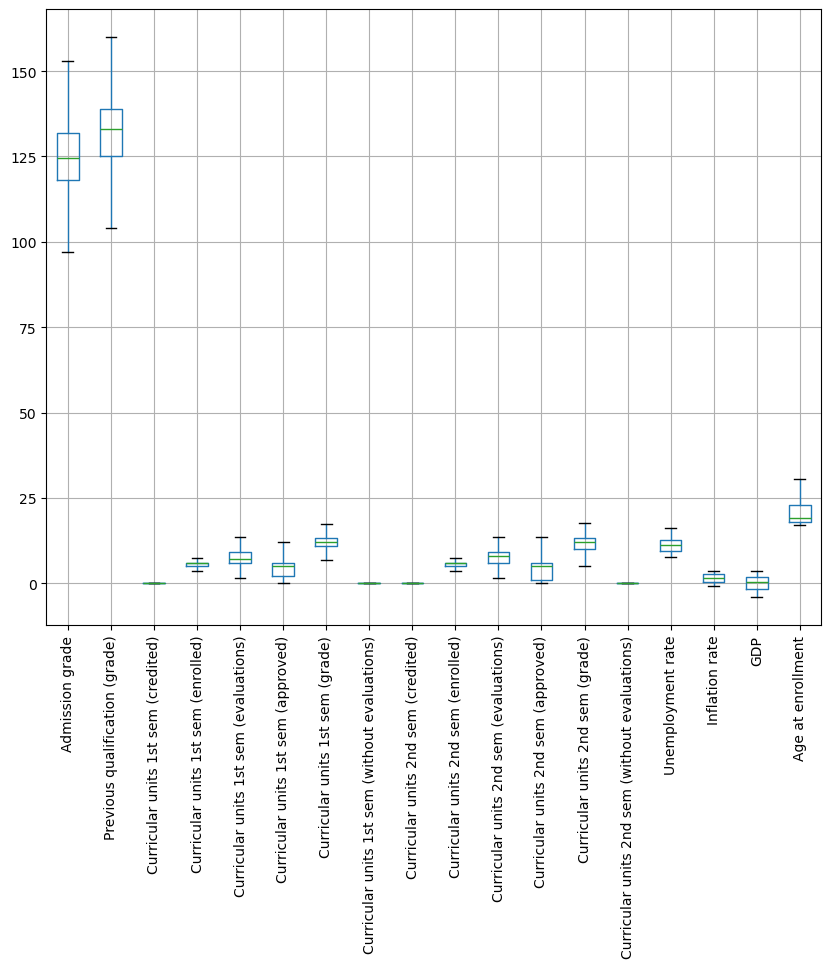

In [88]:
test_num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

#### Scaling Numerical Variables

In [90]:
#test_num_df.hist(bins=20, figsize= (15,15))
#plt.show()

In [91]:
# Identify columns to scale
right_skewed_cols = ['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                     'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                    'Age at enrollment',]
symmetric_cols = ['Admission grade', 'Previous qualification (grade)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    test_num_df[col] = np.log1p(test_num_df[col])

# Apply MinMaxScaler for skewed columns
test_num_df[right_skewed_cols] = min_max_scaler.fit_transform(test_num_df[right_skewed_cols])

# Apply StandardScaler for symmetric columns
test_num_df[symmetric_cols] = standard_scaler.fit_transform(test_num_df[symmetric_cols])

print("Scaling complete. Scaled data:")
test_num_df.head(3)

Scaling complete. Scaled data:


,Admission grade,Previous qualification (grade),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment
0,2.227726,0.824995,0,0.904677,0.000000,0.000000,-1.786920,0,0,1.000000,0.000000,0.000000,-1.702969,0,13.9,-0.3,0.79,0.096615
1,-0.725444,-0.407292,0,0.694718,0.661686,0.758654,1.306719,0,0,0.694718,0.585724,0.727675,0.761030,0,11.1,0.6,2.02,0.188273
2,-0.916239,-1.355205,0,0.694718,0.892345,0.758654,0.199376,0,0,0.694718,0.892345,0.670030,0.025508,0,15.5,2.8,-4.06,0.096615


In [92]:
test_cleaned = pd.concat([test_cat_df, test_num_df], axis=1) # combining scaled and encoded data frames

# Prediction

In [94]:
test_cleaned.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Age at enrollment
0,1,1,1,9500,1,1,1,3,1,2,...,0,1.000000,0.000000,0.000000,-1.702969,0,13.9,-0.3,0.79,0.096615
1,1,1,1,9238,1,1,1,1,19,4,...,0,0.694718,0.585724,0.727675,0.761030,0,11.1,0.6,2.02,0.188273
2,1,1,1,9238,1,1,1,1,19,4,...,0,0.694718,0.892345,0.670030,0.025508,0,15.5,2.8,-4.06,0.096615
3,1,44,1,9147,1,39,1,1,19,3,...,0,1.000000,1.000000,0.670030,0.025508,0,8.9,1.4,3.51,0.514071
4,1,39,1,9670,1,1,1,1,37,5,...,0,0.694718,0.788627,0.601851,-0.072562,0,7.6,2.6,0.32,0.724542


In [95]:
test_cleaned["Target"] = rf.predict(test_cleaned)

In [96]:
test_cleaned["Target"].value_counts()

Target
Graduate    26609
Dropout     15221
Enrolled     9182
Name: count, dtype: int64

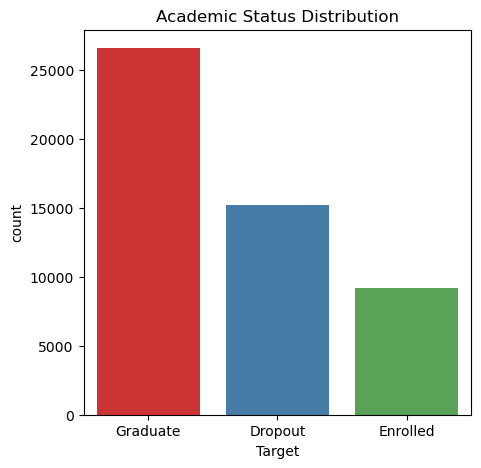

In [97]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=test_cleaned, x='Target', order=test_cleaned['Target'].value_counts().index, palette='Set1')
ax.set_xticklabels(['Graduate','Dropout','Enrolled'], rotation=0)
plt.title("Academic Status Distribution")
plt.show()
#0 - Dropout
#1 - Enrolled
#2 - Graduate

In [98]:
test_acad_status= test_cleaned["Target"]

In [99]:
df = pd.read_csv("C:\\Users\\sachi\\Downloads\\Academic_Success_data\\test.csv")
Id_df = df["id"]

In [100]:
test_pred= pd.concat([Id_df, test_acad_status], axis=1)

In [101]:
test_pred['Target'] = test_pred['Target'].replace({0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}) #converting target into previous form

In [102]:
test_pred.head(3) 

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate


In [103]:
test_pred.shape

(51012, 2)

In [104]:
test_pred.to_csv("C:\\Users\\sachi\\Downloads\\test_pred_academic_status.csv", index=False) #saving predicted dataset

## Conclusion

- The academic status classification task is performed on test data using Random Forest Classifier.
- According to the prediction, 26609 students are graduated,15221 and 9182 are enrolled.